In [258]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('./data/')
df.loc[df['wave_direction'] == 'min', 'wave_direction'] = 1
df.loc[df['wave_direction'] == 'max', 'wave_direction'] = -1
df = df.astype({"wave_direction": 'float64'})
df.drop('0_price', axis=1, inplace=True)
df.drop('1_price', axis=1, inplace=True)
df.drop('2_price', axis=1, inplace=True)
df.drop('3_price', axis=1, inplace=True)
df.drop('4_price', axis=1, inplace=True)


# df = df[df['stabilized_spread'] >= 0.2]
df = df[abs(df['last_price_delta_since_stabilized']) < 10]
df = df[abs(df['last_price_delta_since_stabilized']) > 0.2]
df = df[df['stabilized_spread'] < 10] # nem tul nagy spread
df = df[df['stabilized_amount_mean'] < 0.4]  # nem tul nagy tradek
df = df[df['stabilized_nr_trades'] < 300]  # nem tul sok trade

for col in df.columns:
    if 'nr_trades' in col or 'price_delta' in col and not col.startswith('last'):
        df.drop(col, axis=1, inplace=True)
# df.drop('wave_direction', axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)
df

,0_amount_mean,0_spread,1_amount_mean,1_spread,2_amount_mean,2_spread,3_amount_mean,3_spread,4_amount_mean,4_spread,last_price_delta_since_stabilized,stabilized_amount_mean,stabilized_at_ms,stabilized_spread,wave_direction
0,0.0140,0.37,0.0125,0.37,0.0176,0.62,0.0491,0.67,0.0470,0.77,-0.36,0.0448,214,0.77,-1.0
1,0.0270,0.48,0.0463,0.52,0.0423,0.52,0.0462,0.72,0.0437,0.76,0.51,0.0415,91,0.79,1.0
2,0.0012,0.44,0.0022,0.57,0.0019,0.57,0.0019,0.58,0.0034,0.78,0.42,0.0046,221,0.78,1.0
3,0.0417,0.69,0.0221,0.79,0.0202,0.79,0.0573,0.79,0.0563,0.87,-0.49,0.0526,300,0.95,-1.0
4,0.0053,0.33,0.0569,0.39,0.0551,0.39,0.0527,0.49,0.0534,0.51,-0.44,0.0488,185,0.51,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14527,0.0256,0.30,0.0349,0.31,0.0275,0.45,0.0338,0.45,0.0297,0.56,-1.03,0.0283,57,0.62,-1.0
14528,0.0043,0.04,0.0042,0.04,0.0038,0.23,0.0034,0.25,0.0031,0.25,0.49,0.0038,378,0.44,1.0
14529,0.0782,0.35,0.0696,0.50,0.0664,0.56,0.0639,0.57,0.0587,0.58,1.76,0.0549,284,0.61,1.0
14530,0.0082,0.66,0.0053,0.66,0.0048,0.66,0.0044,0.66,0.0041,0.66,0.79,0.0116,273,0.83,1.0


In [259]:
# sns.scatterplot(x=df['4_nr_trades'], y=abs(df.last_price_delta_since_stabilized))

a = df.corr().last_price_delta_since_stabilized * 1000
a.sort_values(axis=0)

0_amount_mean                         -22.525681
1_amount_mean                         -21.479357
4_amount_mean                         -17.575865
stabilized_amount_mean                -17.394833
3_amount_mean                         -16.621386
2_amount_mean                         -15.394407
4_spread                              -12.624001
3_spread                              -11.711134
stabilized_spread                     -11.384884
2_spread                              -10.711717
1_spread                               -9.610389
stabilized_at_ms                        1.805831
0_spread                                2.544810
wave_direction                        733.746113
last_price_delta_since_stabilized    1000.000000
Name: last_price_delta_since_stabilized, dtype: float64

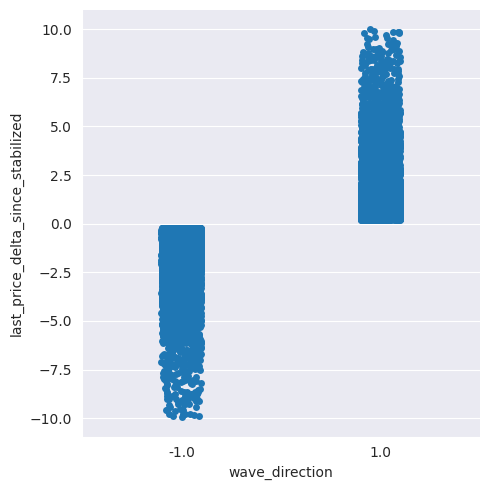

In [260]:
# df.wave_direction.mean()
sns.catplot(x=df.wave_direction, y=df.last_price_delta_since_stabilized)


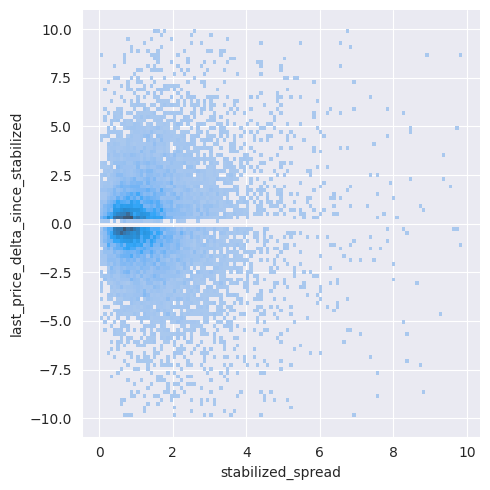

In [261]:
sns.displot(y=df.last_price_delta_since_stabilized, x=df.stabilized_spread)


In [262]:
waves = df.copy()
cols = waves.columns
for col in cols:
    if not '_price_delta' in col:
        waves.drop(col, inplace=True, axis=1)
# waves.drop('last_price_delta_since_stabilized', inplace=True, axis=1)
display(waves)

# sns.barplot()



,last_price_delta_since_stabilized
0,-0.36
1,0.51
2,0.42
3,-0.49
4,-0.44
...,...
14527,-1.03
14528,0.49
14529,1.76
14530,0.79
